<a href="https://colab.research.google.com/github/DiegowAngel/Modelos-de-Regresion-Lineal/blob/main/Modelos_de_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [ ]:
data= pd.read_csv('cuentas_credicel.csv', encoding='latin-1')
data.head(10)

In [ ]:
data.info()

In [ ]:
# Antes de empezar a tratar la información, voy a obtener solamente las variables cuantitativas
# Omitiré incluir la columna 35 y 36 debido a que tienen muchos valores nulos, y no tienen título por loq ue no se puede obtener mucho de ellas
data1 =data.iloc[ : , [0, 2, 6, 7, 8, 9, 11, 12, 13, 16, 17, 19, 20, 21, 25, 26, 27, 28, 29]]
data1
data1.head(10)

In [ ]:
#Busco valores nulos
v_n=data1.isnull().sum()
v_n


In [ ]:
# Voy a remplazar por el promedio pues me parece lo más óptimo
data1["puntos"] =data1["puntos"].fillna(round(data1["puntos"].mean(),1))
data1["porc_enganche"] =data1["porc_enganche"].fillna(round(data1["porc_enganche"].mean(),1))

In [ ]:
data1['plazo']=data1['plazo'].str.replace('S', '')

In [ ]:
data1['plazo']= data1['plazo'].astype(int)

In [ ]:
riesgo_categorias = data1.groupby(['riesgo'])['riesgo'].count()
riesgo_categorias

In [ ]:
#Sustituyo los strings Atraso, Cancelado y Fraude por la constante "0"
data1['riesgo']=data1['riesgo'].str.replace('Atraso', '0')
data1['riesgo']=data1['riesgo'].str.replace('Cancelado', '0')
data1['riesgo']=data1['riesgo'].str.replace('Fraude', '0')

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a int
data1['riesgo']= data1['riesgo'].astype(float)

In [ ]:
data1["riesgo"]= data1["riesgo"].fillna(0)

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  float64
 4   enganche          22735 non-null  float64
 5   descuento         22735 non-null  float64
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  int64  
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  int64  
 10  fraude            22735 non-null  int64  
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  int64  
 13  reautorizacion    22735 non-null  int64  
 14  puntos            22735 non-null  float64
 15  riesgo            22735 non-null  float64
 16  porc_enganche     22735 non-null  float6

In [ ]:
v_n=data1.isnull().sum()
v_n

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
# Utilizamos el procedimiento de cuantiles para deshacernos de los valores atípicos
y=data1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
dataF= data1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
fig = plt.figure(figsize =(15, 8))
dataF.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Revisamos nuevamente

In [ ]:
df=dataF.copy()
df=df.fillna(round(dataF.mean(),1))
df

In [ ]:
v_n=df.isnull().sum()
v_n

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Predicciones 3    22735 non-null  float64
 1   Predicciones 2    22735 non-null  float64
 2   Predicciones 1    22735 non-null  float64
 3   folio             22735 non-null  int64  
 4   folio_solicitud   22735 non-null  int64  
 5   plazo             22735 non-null  int64  
 6   precio            22735 non-null  float64
 7   enganche          22735 non-null  float64
 8   descuento         22735 non-null  float64
 9   monto_financiado  22735 non-null  float64
 10  costo_total       22735 non-null  float64
 11  monto_accesorios  22735 non-null  float64
 12  status            22735 non-null  float64
 13  fraude            22735 non-null  float64
 14  inversion         22735 non-null  float64
 15  pagos_realizados  22735 non-null  float64
 16  reautorizacion    22735 non-null  float6

MODELO 1

<Axes: xlabel='precio', ylabel='enganche'>

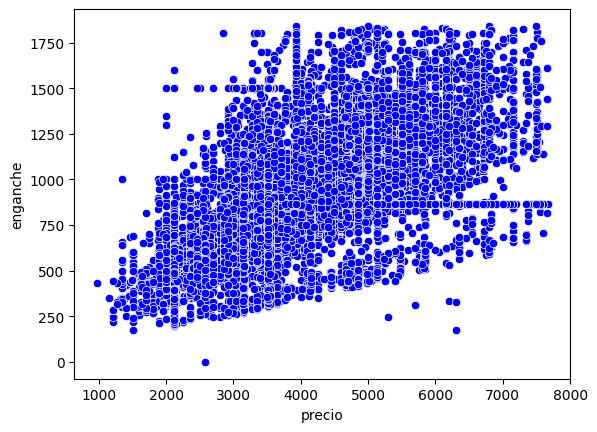

In [61]:
from turtle import color
sns.scatterplot(x='precio', y='enganche', color="blue", data=df)

In [62]:
vr_Indep= df[['precio']]
vr_Dep= df['enganche']

In [63]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [64]:
model.fit(X=vr_Indep, y=vr_Dep)

LinearRegression()

In [65]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.16992509]),
 'rank_': 1,
 'singular_': array([187699.0540773]),
 'intercept_': 198.13348551014246}

In [ ]:
y_pred= model.predict(X=df[['precio']])

In [67]:
df.insert(0, 'Predicciones 1', y_pred)

<Axes: xlabel='precio', ylabel='enganche'>

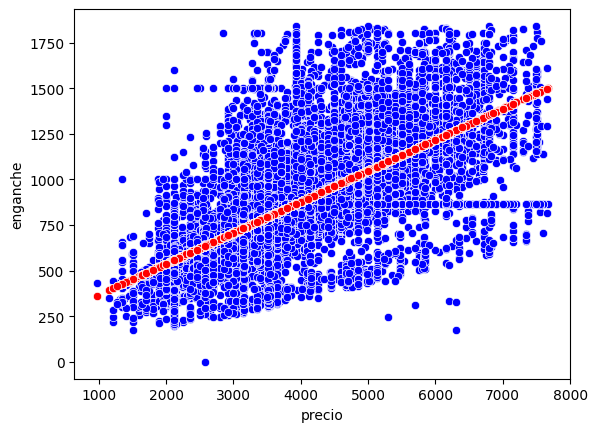

In [69]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='precio', y='enganche', color="blue", data=df)
sns.scatterplot(x='precio', y='Predicciones 1', color="red", data=df)

In [70]:
# Coeficiente de determinación
coef_Deter=model.score(X=vr_Indep, y=vr_Dep)
coef_Deter

0.4403579446030741

In [71]:
# Coeficiente de correlación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.663594714116285

MODELO 2

<Axes: xlabel='monto_financiado', ylabel='precio'>

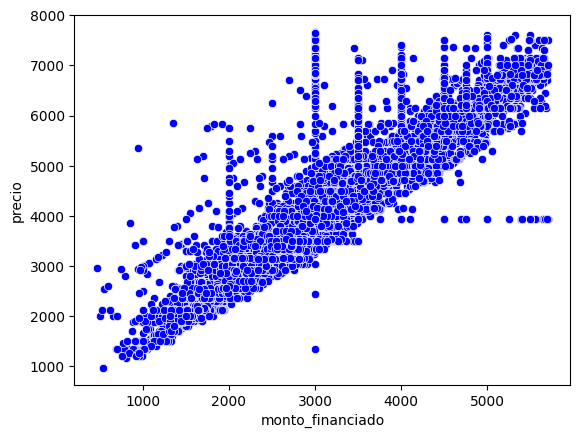

In [72]:
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=df)

In [74]:
vr_Indep= df[['monto_financiado']]
vr_Dep= df['precio']

In [75]:
model2= LinearRegression()

In [76]:
model2.fit(X=vr_Indep, y=vr_Dep)

LinearRegression()

In [77]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.18232773]),
 'rank_': 1,
 'singular_': array([144242.7379923]),
 'intercept_': 386.3666426473533}

In [ ]:
y_pred= model2.predict(X=df[['monto_financiado']])

In [82]:
df.insert(0, 'Predicciones 2', y_pred)

<Axes: xlabel='monto_financiado', ylabel='precio'>

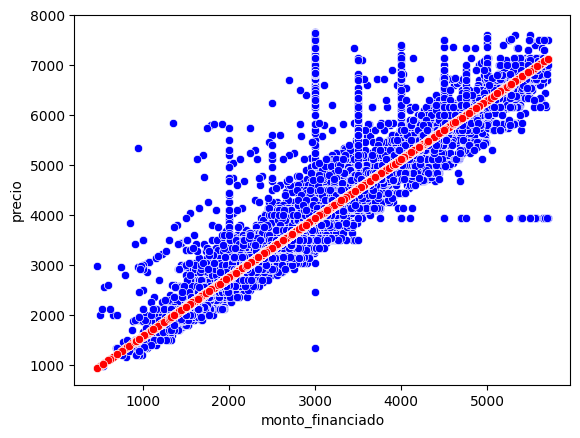

In [83]:
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=df)
sns.scatterplot(x='monto_financiado', y='Predicciones 2', color="red", data=df)

In [84]:
# Coeficiente de determinación
coef_Deter=model2.score(X=vr_Indep, y=vr_Dep)
coef_Deter

0.825542619216605

In [85]:
# Coeficiente de correlación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9085937591776674

MODELO 3

<Axes: xlabel='monto_financiado', ylabel='costo_total'>

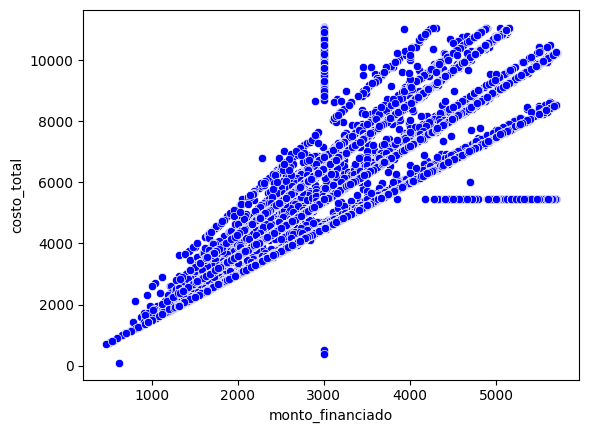

In [87]:
sns.scatterplot(x='monto_financiado', y='costo_total', color="blue", data=df)

In [96]:
vr_Indep= df[['monto_financiado']]
vr_Dep= df['costo_total']

In [97]:
model3= LinearRegression()

In [ ]:
model3.fit(X=vr_Indep, y=vr_Dep)

In [ ]:
model3.__dict__

In [100]:
y_pred= model3.predict(X=df[['monto_financiado']])

In [103]:
df.insert(0, 'Predicciones 3', y_pred)

In [ ]:
sns.scatterplot(x='monto_financiado', y='costo_total', color="blue", data=df)
sns.scatterplot(x='monto_financiado', y='Predicciones 3', color="red", data=df)

In [105]:
# Coeficiente de determinación y correlación
coef_Deter=model3.score(X=vr_Indep, y=vr_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8530444384547899

MODELO 4

In [ ]:
sns.scatterplot(x='monto_financiado', y='pagos_realizados', color="blue", data=df)

In [131]:
vr_Indep= df[['monto_financiado']]
vr_Dep= df['pagos_realizados']

In [132]:
model4= LinearRegression()

In [ ]:
model4.fit(X=vr_Indep, y=vr_Dep)

In [ ]:
model4.__dict__

In [135]:
y_pred= model4.predict(X=df[['monto_financiado']])

In [136]:
df.insert(0, 'Predicciones 4', y_pred)

In [ ]:
sns.scatterplot(x='monto_financiado', y='pagos_realizados', color="blue", data=df)
sns.scatterplot(x='monto_financiado', y='Predicciones 4', color="red", data=df)

In [139]:
coef_Deter=model4.score(X=vr_Indep, y=vr_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.04210767304235516

MODELO 5

In [ ]:
sns.scatterplot(x='porc_enganche', y='riesgo', color="blue", data=df)

In [157]:
vr_Indep= df[['porc_enganche']]
vr_Dep= df['riesgo']

In [158]:
model5= LinearRegression()

In [159]:
model5.fit(X=vr_Indep, y=vr_Dep)

LinearRegression()

In [160]:
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['porc_enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.23500076]),
 'rank_': 1,
 'singular_': array([315.995682]),
 'intercept_': 0.7123118762077256}

In [161]:
y_pred= model5.predict(X=df[['porc_enganche']])

In [162]:
df.insert(0, 'Predicciones 5', y_pred)

In [ ]:
sns.scatterplot(x='porc_enganche', y='riesgo', color="blue", data=df)
sns.scatterplot(x='porc_enganche', y='Predicciones 5', color="red", data=df)

In [164]:
coef_Deter=model5.score(X=vr_Indep, y=vr_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1728665615806825

MODELO 6

In [ ]:
df.info()

<Axes: xlabel='costo_total', ylabel='plazo'>

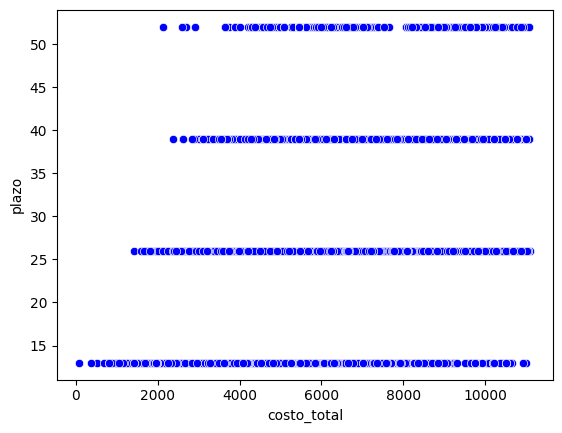

In [194]:
sns.scatterplot(x='costo_total', y='plazo', color="blue", data=df)

In [196]:
vr_Indep= df[['costo_total']]
vr_Dep= df['plazo']
model6= LinearRegression()
model6.fit(X=vr_Indep, y=vr_Dep)

LinearRegression()

In [197]:
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00257056]),
 'rank_': 1,
 'singular_': array([292859.83324464]),
 'intercept_': 11.903874079129464}

<Axes: xlabel='costo_total', ylabel='plazo'>

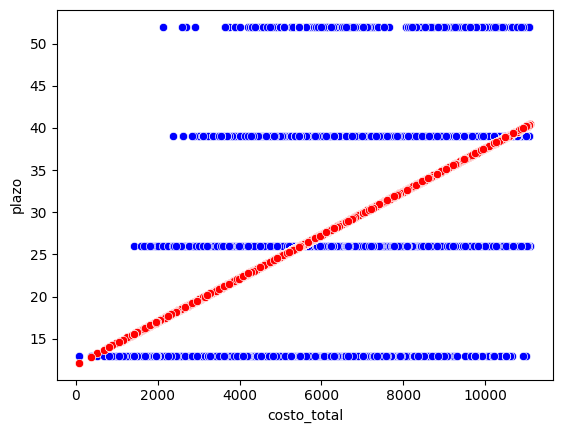

In [201]:
y_pred= model6.predict(X=df[['costo_total']])
df.insert(0, 'Predicciones 6', y_pred)
sns.scatterplot(x='costo_total', y='plazo', color="blue", data=df)
sns.scatterplot(x='costo_total', y='Predicciones 6', color="red", data=df)

In [202]:
coef_Deter=model6.score(X=vr_Indep, y=vr_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4998651364467171

MODELO 7

In [ ]:
sns.scatterplot(x='precio', y='monto_financiado', color="blue", data=dataF)

In [205]:
vr_Indep= df[['precio']]
vr_Dep= df['monto_financiado']
model7= LinearRegression()
model7.fit(X=vr_Indep, y=vr_Dep)

LinearRegression()

In [206]:
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.69823501]),
 'rank_': 1,
 'singular_': array([187699.0540773]),
 'intercept_': 253.90843777706823}

<Axes: xlabel='precio', ylabel='monto_financiado'>

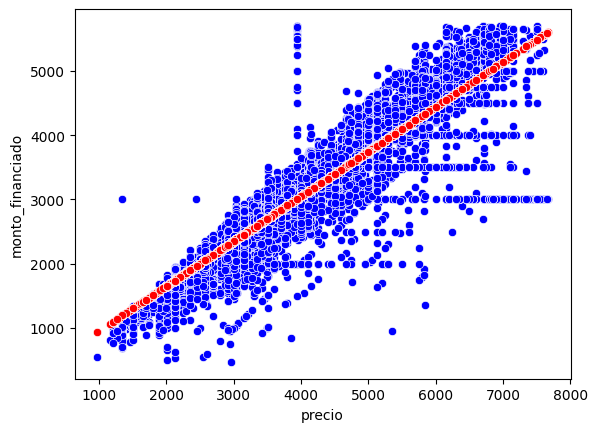

In [209]:
y_pred= model7.predict(X=df[['precio']])
df.insert(0, 'Predicciones 7', y_pred)
sns.scatterplot(x='precio', y='monto_financiado', color="blue", data=df)
sns.scatterplot(x='precio', y='Predicciones 7', color="red", data=df)

In [210]:
coef_Deter=model7.score(X=vr_Indep, y=vr_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9085937591776674

MODELO 8

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Predicciones 8    22735 non-null  float64
 1   Predicciones 7    22735 non-null  float64
 2   Predicciones 6    22735 non-null  float64
 3   Predicciones 5    22735 non-null  float64
 4   Predicciones 4    22735 non-null  float64
 5   Predicciones 3    22735 non-null  float64
 6   Predicciones 2    22735 non-null  float64
 7   Predicciones 1    22735 non-null  float64
 8   folio             22735 non-null  int64  
 9   folio_solicitud   22735 non-null  int64  
 10  plazo             22735 non-null  int64  
 11  precio            22735 non-null  float64
 12  enganche          22735 non-null  float64
 13  descuento         22735 non-null  float64
 14  monto_financiado  22735 non-null  float64
 15  costo_total       22735 non-null  float64
 16  monto_accesorios  22735 non-null  float6

<Axes: xlabel='enganche', ylabel='porc_enganche'>

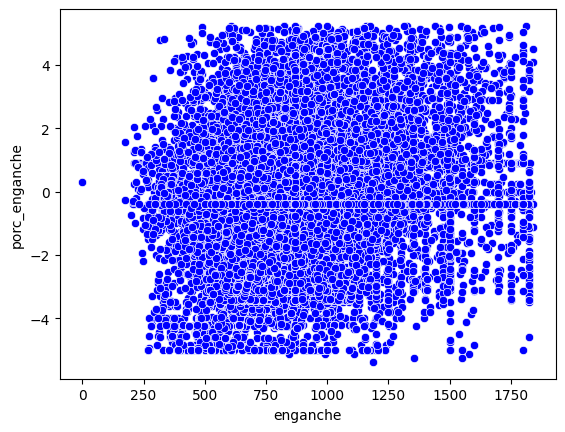

In [245]:
sns.scatterplot(x='enganche', y='porc_enganche', color="blue", data=df)

In [246]:
vr_Indep= df[['enganche']]
vr_Dep= df['porc_enganche']
model8= LinearRegression()
model8.fit(X=vr_Indep, y=vr_Dep)

LinearRegression()

In [247]:
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00141764]),
 'rank_': 1,
 'singular_': array([48063.64212986]),
 'intercept_': -1.590517253721502}

In [248]:
df = df.drop ('Predicciones 8', axis = 1)

<Axes: xlabel='enganche', ylabel='porc_enganche'>

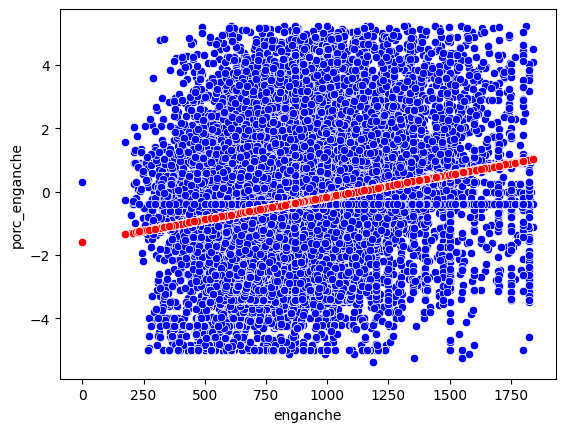

In [249]:
y_pred= model8.predict(X=df[['enganche']])
df.insert(0, 'Predicciones 8', y_pred)
sns.scatterplot(x='enganche', y='porc_enganche', color="blue", data=df)
sns.scatterplot(x='enganche', y='Predicciones 8', color="red", data=df)

In [250]:
coef_Deter=model8.score(X=vr_Indep, y=vr_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21562593956144502